## Load libraries

In [62]:
%matplotlib inline
#%pylab inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io import gbq
import numpy as np
import scipy as sp
import scipy.stats as stats
import seaborn as sns

import os
import re
import json
import math
import operator
from time import time
from datetime import datetime
import random
import cPickle

from pandas.tools.plotting import scatter_matrix

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import scale, normalize
from sklearn.cross_validation import train_test_split

from sklearn.model_selection import KFold, StratifiedKFold 
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

from sklearn.linear_model import LogisticRegression


## Load Dataset

In [2]:
# contract data
data = pd.read_csv("merged.csv")


# data exploration
data.head()

/Users/yyang/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,234) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,market,party_id,Count.of.Assets.Up.for.renewal.5.2017,Recently.bought.contract_3.Mon,Recently.Cancelled.Contract_3.Mon,Recently.bought.contract_6.Mon,Recently.Cancelled.Contract_6.Mon,Recently.bought.contract_9.Mon,Recently.Cancelled.Contract_9.Mon,Recently.bought.contract_12.Mon,...,demographic_owner_occupied,demographic_units_occupied,demographic_white,demographic_race_Black,demographic_race_American.Indian.and.Alaska.Native,demographic_race_Asian,demographic_mortgage,demographic_owner_mortgage,demographic_housing_year,demographic_travel_time
0,820,8155213,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,25604821,4,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,4696205,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001,25604821,4,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1030,25604821,4,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(6232, 238)

In [4]:
data.columns.values

array(['market', 'party_id', 'Count.of.Assets.Up.for.renewal.5.2017',
       'Recently.bought.contract_3.Mon',
       'Recently.Cancelled.Contract_3.Mon',
       'Recently.bought.contract_6.Mon',
       'Recently.Cancelled.Contract_6.Mon',
       'Recently.bought.contract_9.Mon',
       'Recently.Cancelled.Contract_9.Mon',
       'Recently.bought.contract_12.Mon',
       'Recently.Cancelled.Contract_12.Mon', 'clc.3', 'clc6', 'clc9',
       'clc12', 'X', 'Total.count.of.CFB.assets.by.Party.ID_5.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_6.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_7.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_8.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_9.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_10.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_11.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_12.16.2017',
       'Total.count.of.CFB.assets.by.Party.ID_1.17.2017',
       'Total.count.of.C

In [5]:
data.dtypes

market                                                                            object
party_id                                                                           int64
Count.of.Assets.Up.for.renewal.5.2017                                              int64
Recently.bought.contract_3.Mon                                                     int64
Recently.Cancelled.Contract_3.Mon                                                  int64
Recently.bought.contract_6.Mon                                                     int64
Recently.Cancelled.Contract_6.Mon                                                  int64
Recently.bought.contract_9.Mon                                                     int64
Recently.Cancelled.Contract_9.Mon                                                  int64
Recently.bought.contract_12.Mon                                                    int64
Recently.Cancelled.Contract_12.Mon                                                 int64
clc.3                

In [6]:
#rename variable names
data.rename(columns={ 
    'Count.of.Assets.Up.for.renewal.5.2017': 'count_of_assets_up_for_renewal_5_2017',
       'Recently.bought.contract_3.Mon': 'recently_bought_contract_3_mon',
       'Recently.Cancelled.Contract_3.Mon': 'recently_cancelled_contract_3_mon',
       'Recently.bought.contract_6.Mon': 'recently_bought_contract_6_Mon',
       'Recently.Cancelled.Contract_6.Mon': 'recently_cancelled_contract_6_mon',
       'Recently.bought.contract_9.Mon': 'recently_bought_contract_9_mon',
       'Recently.Cancelled.Contract_9.Mon': 'recently_cancelled_contract_9_mon',
       'Recently.bought.contract_12.Mon': 'recently_bought_contract_12_Mon',
       'Recently.Cancelled.Contract_12.Mon': 'recently_cancelled_contract_12_mon', 
       'clc.3':'clc3', 
       'Total.count.of.CFB.assets.by.Party.ID_5.16.2017': 'total_count_of_CFB_assets_by_party_id_5_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_6.16.2017': 'total_count_of_CFB_assets_by_party_id_6_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_7.16.2017': 'total_count_of_CFB_assets_by_party_id_7_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_8.16.2017': 'total_count_of_CFB_assets_by_party_id_8_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_9.16.2017': 'total_count_of_CFB_assets_by_party_id_9_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_10.16.2017': 'total_count_of_CFB_assets_by_party_id_10_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_11.16.2017': 'total_count_of_CFB_assets_by_party_id_11_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_12.16.2017': 'total_count_of_CFB_assets_by_party_id_12_16_2017',
       'Total.count.of.CFB.assets.by.Party.ID_1.17.2017': 'total_count_of_CFB_assets_by_party_id_1_17_2017',
       'Total.count.of.CFB.assets.by.Party.ID_2.17.2017': 'total_count_of_CFB_assets_by_party_id_2_17_2017',
       'Total.count.of.CFB.assets.by.Party.ID_3.17.2017': 'total_count_of_CFB_assets_by_party_id_3_17_2017',
       'Total.count.of.CFB.assets.by.Party.ID_4.17.2017': 'total_count_of_CFB_assets_by_party_id_4_17_2017',
       'Total.count.of.CFB.assets.by.Party.ID_5.17.2017': 'total_count_of_CFB_assets_by_party_id_5_17_2017',
    'Annual_Contract_Value': 'annual_contract_value', 
    'ORIGINAL_TOTAL_NET': 'original_total_net', 
    'Account.Sub.Type': 'account_sub_type',
    'Asset.Display.ID': 'asset_display_ID', 
    'Renewal.Flag': 'renewal_flag', 
    'Monthname': 'month_name', 
    'Period': 'period', 
    'MARKET': 'market',
    'ID': 'id', 
    'New_STATUS': 'new_status', 
    'OLD_Start_Date': 'old_start_date',
    'OLD_END_DATE': 'old_end_date', 
    'END_DATE': 'end_date', 
    'OLD_CONTRACT_TERM': 'old_contract_term',
    'NEW_CONTRACT_TERM': 'new_contract_term', 
    'old_fast_Flex': 'old_fast_flex', 
    'OLD_STATUS': 'old_status',
    'assest_wid_new': 'asset_wid_new', 
    'LAST_ACTIVITY_DATE': 'last_activity_date',
    'Product_Name': 'product_name', 
    'Account_ID': 'account_id', 
    'Acount_Name': 'account_name', 
    'Account_Type': 'account_type', 
    'CLC': 'clc',
    'CLC_Same_Zip': 'clc_same_zip', 
    'Old_Line_Type': 'old_line_type', 
    'New_Line_Type': 'new_line_type', 
    'Market_tier': 'market_tier',
    'FOLLOW_UP_STATUS': 'follow_up_status', 
    'Total_Credit_Amount': 'total_credit_amount', 
    'TOTAL_CONTRACT_VALUE': 'total_contract_value',
    'USER_ROLE_DESC': 'user_role_desc', 
    '.Renewal_Price ': 'renewal_price',
    '.Expiring_Contract_Total_Net ': 'expiring_contract_total_net', 
    'Promised_leads': 'promised_leads',
    'expected.leads.per.month': 'expected_leads_per_month', 
    'Flex_total_slots': 'flex_total_slots',
    '.Flex_total_slot_value ': 'flex_total_slot_value', 
    'Fast_total_slots': 'fast_total_slots',
    '.Fast_total_slot_value ': 'fast_total_slot_value', 
    '.overall_avg_lead_listing_price.': 'overall_avg_lead_listing_price',
    'Total.leads.in.3.Month': 'total_leads_in_3_month', 
    'expected.lead.3.Mon.': 'expected_leads_in_3_month',
    'Full.fillment...3Mon.': 'fulfillment_perc_in_3_month', 
    'total.leads.in.6.months': 'total_leads_in_6_month', 
    'expected.lead.6.Mon': 'expected_leads_in_6_month',
    'fulfllment...6Mon.': 'fulfillment_perc_in_6_month', 
    'total.leads.in.9.months': 'total_leads_in_9_month', 
    'expected.leads.9Mon': 'expected_leads_in_9_month',
    'fulfillment...9.Mon.': 'fulfillment_perc_in_9_month', 
    'total.leads.in.12.months': 'total_leads_in_12_month',
    'expected.lead.12.Mon': 'expected_leads_in_12_month', 
    'lead fullfilment % 12Mon': 'fulfillment_perc_in_12_month',
    '.month_1_leads_avg_price ': 'month_1_leads_avg_price',
    '.month_2_leads_avg_price ': 'month_2_leads_avg_price', 
    '.month_3_leads_avg_price ': 'month_3_leads_avg_price',
    '.month_4_leads_avg_price ': 'month_4_leads_avg_price', 
    '.month_5_leads_avg_price ': 'month_5_leads_avg_price',
    '.month_6_leads_avg_price ': 'month_6_leads_avg_price', 
    '.month_7_leads_avg_price ': 'month_7_leads_avg_price',
    '.month_8_leads_avg_price ': 'month_8_leads_avg_price', 
    '.month_9_leads_avg_price ': 'month_9_leads_avg_price',
    '.month_10_leads_avg_price ': 'month_10_leads_avg_price', 
    '.month_11_leads_avg_price ': 'month_11_leads_avg_price',
    '.month_12_leads_avg_price ': 'month_12_leads_avg_price', 
    '.month_13_leads_avg_price ': 'month_13_leads_avg_price',
    'total_HLC': 'total_hlc', 
    'cust_Interactions': 'cust_interactions', 
    'cust_cb_Interactions': 'cust_cb_interactions', 
    'Asset_Interactions': 'asset_interactions', 
    'Median.Price.of.leads': 'median_price_of_leads', 
    'leads.in.last.3.months.of.contract': 'leads_in_last_3_months',
    'lead...in.last.3.months': 'lead_perc_in_last_3_months', 
    'Asset.Start.date': 'asset_start_date', 
    'Asset.End.date': 'asset_end_date',
    'contract.start.Month': 'contract_start_month', 
    'contrct.start.year': 'contract_start_year',
    'Season.contract.starts': 'season_contract_starts', 
    'season.contract.start': 'season_contract_starts_dum',
    'contract.start.day': 'contract_start_date', 
    'season.contract.ends': 'season_contract_ends', 
    'contract.end.day': 'contract_end_date',
    'expiring.day': 'expiring_day', 
    'week.contract.expires': 'week_contract_expires', 
    'month.contract.expires': 'month_contract_expires',
    'Waitlist.at.end.of.contract': 'waitlist_at_end_of_contract', 
    'New.Price.Tier': 'new_price_tier',
    'Rate.card.price..New.Tier.': 'rate_card_price_new_tier',
    'Manual.Price.Override.flag...0.none..1..price.override.': 'manual_price_override_flag_0_none_1_price_override',
    'ManualDiscount_amt': 'manual_discount_amt', 
    'Manual_discount': 'manual_discount', 
    'Promo_disc': 'promo_disc', 
    'ToTaL_DISC': 'total_disc',
    'State': 'state',
    'X20.Tier': "X20_tier",
    'lead.fullfilment...12Mon': 'lead_fulfillment_12_mon',
    'Month.1_Recommended': 'month_1_recommended',
    'Month.1_Sold': 'month_1_sold',
    'Month.1_Sell.thru.': 'month_1_sell_thru',
    'Month.2_Recommended': 'month_2_recommended', 
    'Month.2_Sold': 'month_2_sold',
    'Month.2_sell.thru..': 'month_2_sell_thru', 
    'Month.3_Recommended': 'month_3_recommended', 
    'Month.3_Sold': 'month_3_sold',
    'Month.3_sell.thru..': 'month_3_sell_thru', 
    'Market.Segmentation_3.Mon': 'market_segmentation_3_mon',
    'Month.4_Recommended': 'month_4_recommended', 
    'Month.4_Sold': 'month_4_sold', 
    'Month.4_Sell.Thru..': 'month_4_sell_thru',
    'Month.5_Recommended': 'month_5_recommended', 
    'Month.5_Sold': 'month_5_sold', 
    'Month.5_sell.thru..': 'month_5_sell_thru',                         
    'Month.6_Recommended': 'month_6_recommended', 
    'Month.6_Sold': 'month_6_sold', 
    'Month.6_sell.thru.': 'month_6_sell_thru',
    'Market.Segmentation_6Mon': 'market_segmentation_6_mon', 
    'Month.7_Recommended': 'month_7_recommended', 
    'Month.7_Sold': 'month_7_sold',
    'Month.7_sell.thru.': 'month_7_sell_thru', 
    'Month.8_Recommended': 'month_8_recommended', 
    'Month.8_Sold': 'month_8_sold',
    'Month.8_sell.thru.': 'month_8_sell_thru', 
    'Month.9_Recommended': 'month_9_recommended', 
    'Month.9_Sold': 'month_9_sold',
    'Month.9_sell.thru.': 'month_9_sell_thru', 
    'Market.Segmentation_9.Mon': 'market_segmentation_9_mon',
    'Month.10_Recommended': 'month_10_recommended', 
    'Month.10_Sold': 'month_10_sold', 
    'Month.10_sell.thru.': 'month_10_sell_thru',
    'Month.11_Recommended': 'month_11_recommended', 
    'Month.11_Sold': 'month_11_sold', 
    'Month.11_sell.thru.': 'month_11_sell_thru',
    'Month.12_Recommended': 'month_12_recommended', 
    'Month.12_Sold': 'month_12_sold', 
    'sell.thru.': 'month_12_sell_thru',
    'Market.Segmentation_12.Mon': 'market_segmentation_12_mon', 
    'CLC_3.mo': 'clc_3_mon', 
    'HLC_3.mo': 'hlc_3_mon',
    'Ave.DOM_3.mo': 'ave_dom_3_mon', 
    'CLC_6.mo': 'clc_6_mon', 
    'HLC_6.mo': 'hlc_6_mon', 
    'Ave.DOM_6.mo': 'ave_dom_6_mon', 
    'CLC_9.mo': 'clc_9_mon',
    'HLC_9.mo': 'hlc_9_mon', 
    'Ave.DOM_9.mo': 'ave_dom_9_mon', 
    'CLC_12.mo': 'clc_12_mon', 
    'HLC_12.mo': 'hlc_12_mon',
    'Ave.DOM_12.mo': 'ave_dom_12_mon', 
    'Current.Median.Price': 'current_median_price', 
    'waitlist.3.Mon': 'waitlist_3_mon',
    'Waitlist.6.mon': 'waitlist_6_mon', 
    'waitlist.9.mon': 'waitlist_9_mon',
    'waitlist.12.Mon': 'waitlist_12_mon', 
    'demographic_occupation_service.occupations': 'demographic_occupation_service_occupations',
    'demographic_occupation_Sales.and.office.occupations': 'demographic_occupation_Sales_and_office_occupations',
    'demographic_race_American.Indian.and.Alaska.Native':'demographic_race_American_Indian_And_Native'
                             }, 
                     inplace=True)


In [7]:
data.columns.values

array(['market', 'party_id', 'count_of_assets_up_for_renewal_5_2017',
       'recently_bought_contract_3_mon',
       'recently_cancelled_contract_3_mon',
       'recently_bought_contract_6_Mon',
       'recently_cancelled_contract_6_mon',
       'recently_bought_contract_9_mon',
       'recently_cancelled_contract_9_mon',
       'recently_bought_contract_12_Mon',
       'recently_cancelled_contract_12_mon', 'clc3', 'clc6', 'clc9',
       'clc12', 'X', 'total_count_of_CFB_assets_by_party_id_5_16_2017',
       'total_count_of_CFB_assets_by_party_id_6_16_2017',
       'total_count_of_CFB_assets_by_party_id_7_16_2017',
       'total_count_of_CFB_assets_by_party_id_8_16_2017',
       'total_count_of_CFB_assets_by_party_id_9_16_2017',
       'total_count_of_CFB_assets_by_party_id_10_16_2017',
       'total_count_of_CFB_assets_by_party_id_11_16_2017',
       'total_count_of_CFB_assets_by_party_id_12_16_2017',
       'total_count_of_CFB_assets_by_party_id_1_17_2017',
       'total_count_of_CF

## Feature dataframe

In [8]:
features = ['market', 'party_id', 'count_of_assets_up_for_renewal_5_2017',
       'recently_bought_contract_3_mon',
       'recently_cancelled_contract_3_mon',
       'recently_bought_contract_6_Mon',
       'recently_cancelled_contract_6_mon',
       'recently_bought_contract_9_mon',
       'recently_cancelled_contract_9_mon',
       'recently_bought_contract_12_Mon',
       'recently_cancelled_contract_12_mon', 'clc3', 'clc6', 'clc9',
       'clc12', 'X', 'total_count_of_CFB_assets_by_party_id_5_16_2017',
       'total_count_of_CFB_assets_by_party_id_6_16_2017',
       'total_count_of_CFB_assets_by_party_id_7_16_2017',
       'total_count_of_CFB_assets_by_party_id_8_16_2017',
       'total_count_of_CFB_assets_by_party_id_9_16_2017',
       'total_count_of_CFB_assets_by_party_id_10_16_2017',
       'total_count_of_CFB_assets_by_party_id_11_16_2017',
       'total_count_of_CFB_assets_by_party_id_12_16_2017',
       'total_count_of_CFB_assets_by_party_id_1_17_2017',
       'total_count_of_CFB_assets_by_party_id_2_17_2017',
       'total_count_of_CFB_assets_by_party_id_3_17_2017',
       'total_count_of_CFB_assets_by_party_id_4_17_2017',
       'total_count_of_CFB_assets_by_party_id_5_17_2017',
       'annual_contract_value', 'original_total_net', 'account_sub_type',
       'asset_display_ID', 'renewal_flag', 'month_name', 'period', 'id',
       'lead_fulfillment', 'new_status', 'old_start_date', 'old_end_date',
       'end_date', 'old_contract_term', 'new_contract_term',
       'expiring_quantity', 'old_full_half', 'old_fast_flex',
       'new_full_half', 'new_fast_flex', 'old_status', 'asset_wid_new',
       'asset_wid_old', 'last_activity_date', 'product_name', 'account_id',
       'account_name', 'account_type', 'clc', 'clc_same_zip',
       'old_line_type', 'new_line_type', 'market_tier', 'follow_up_status',
       'total_credit_amount', 'total_contract_value', 'user_role_desc',
       'auto_renewal', 'Renewal_Price', 'Expiring_Contract_Total_Net',
       'promised_leads', 'expected_leads_per_month', 'flex_total_slots',
       'Flex_total_slot_value', 'fast_total_slots',
       'Fast_total_slot_value', 'total_slots_owned', 'active_contracts',
       'recently_bought_contracts', 'recently_cancelled_contracts',
       'con_total_leads', 'overall_avg_lead_listing_price',
       'month_1_leads', 'month_2_leads', 'month_3_leads',
       'total_leads_in_3_month', 'expected_leads_in_3_month',
       'fulfillment_perc_in_3_month', 'month_4_leads', 'month_5_leads',
       'month_6_leads', 'total_leads_in_6_month',
       'expected_leads_in_6_month', 'fulfillment_perc_in_6_month',
       'month_7_leads', 'month_8_leads', 'month_9_leads',
       'total_leads_in_9_month', 'expected_leads_in_9_month',
       'fulfillment_perc_in_9_month', 'month_10_leads', 'month_11_leads',
       'month_12_leads', 'total_leads_in_12_month',
       'expected_leads_in_12_month', 'lead_fulfillment_12_mon',
       'month_13_leads', 'month_1_leads_avg_price',
       'month_2_leads_avg_price', 'month_3_leads_avg_price',
       'month_4_leads_avg_price', 'month_5_leads_avg_price',
       'month_6_leads_avg_price', 'month_7_leads_avg_price',
       'month_8_leads_avg_price', 'month_9_leads_avg_price',
       'month_10_leads_avg_price', 'month_11_leads_avg_price',
       'month_12_leads_avg_price', 'month_13_leads_avg_price',
       'primary_mls_id', 'total_hlc', 'state', 'market_type',
       'cust_interactions', 'cust_comments', 'cust_hours_toclose',
       'cust_cb_interactions', 'cust_cb_comments', 'cust_cb_hours_toclose',
       'asset_interactions', 'asset_comments', 'asset_hours_toclose',
       'median_price_of_leads', 'leads_in_last_3_months',
       'lead_perc_in_last_3_months', 'asset_start_date', 'asset_end_date',
       'contract_start_month', 'contract_start_year',
       'season_contract_starts', 'season_contract_starts_dum',
       'contract_start_date', 'season_contract_ends', 'contract_end_date',
       'expiring_day', 'week_contract_expires', 'month_contract_expires',
       'waitlist_at_end_of_contract', 'promotion', 'new_price_tier',
       'rate_card_price_new_tier',
       'manual_price_override_flag_0_none_1_price_override',
       'manual_discount_amt', 'manual_discount', 'promo_disc',
       'total_disc', 'state', 'X20_tier', 'month_1_recommended',
       'month_1_sold', 'month_1_sell_thru', 'month_2_recommended',
       'month_2_sold', 'month_2_sell_thru', 'month_3_recommended',
       'month_3_sold', 'month_3_sell_thru', 'market_segmentation_3_mon',
       'month_4_recommended', 'month_4_sold', 'month_4_sell_thru',
       'month_5_recommended', 'month_5_sold', 'month_5_sell_thru',
       'month_6_recommended', 'month_6_sold', 'month_6_sell_thru',
       'market_segmentation_6_mon', 'month_7_recommended', 'month_7_sold',
       'month_7_sell_thru', 'month_8_recommended', 'month_8_sold',
       'month_8_sell_thru', 'month_9_recommended', 'month_9_sold',
       'month_9_sell_thru', 'market_segmentation_9_mon',
       'month_10_recommended', 'month_10_sold', 'month_10_sell_thru',
       'month_11_recommended', 'month_11_sold', 'month_11_sell_thru',
       'month_12_recommended', 'month_12_sold', 'month_12_sell_thru',
       'market_segmentation_12_mon', 'clc_3_mon', 'hlc_3_mon',
       'ave_dom_3_mon', 'clc_6_mon', 'hlc_6_mon', 'ave_dom_6_mon',
       'clc_9_mon', 'hlc_9_mon', 'ave_dom_9_mon', 'clc_12_mon',
       'hlc_12_mon', 'ave_dom_12_mon', 'current_median_price',
       'waitlist_3_mon', 'waitlist_6_mon', 'waitlist_9_mon',
       'waitlist_12_mon', 'demographic_med_earnings_workers',
       'demographic_education',
       'demographic_occupation_service_occupations',
       'demographic_occupation_Sales_and_office_occupations',
       'demographic_occupation_Natural_resources_construction_maintenance_occupations',
       'demographic_occupationProduction_transportation_material_moving_occupations',
       'demographic_children', 'demographic_income', 'demograhic_health',
       'demographic_senior', 'demographic_disability', 'demographic_male',
       'demographic_population_in_labor_force',
       'demographic_owner_occupied', 'demographic_units_occupied',
       'demographic_white', 'demographic_race_Black',
       'demographic_race_American_Indian_And_Native',
       'demographic_race_Asian', 'demographic_mortgage',
       'demographic_owner_mortgage', 'demographic_housing_year',
       'demographic_travel_time'
    
]

In [9]:
len(features)

238

In [10]:
features_drop = [
    'renewal_flag', 
    'asset_display_ID',
    'month_13_leads', 
    'month_13_leads_avg_price',
    'current_median_price',
    'state',
    'X', 
    #'total_count_of_CFB_assets_by_party_id_5_16_2017',
    'total_count_of_CFB_assets_by_party_id_6_16_2017',
    'total_count_of_CFB_assets_by_party_id_7_16_2017',
    'total_count_of_CFB_assets_by_party_id_8_16_2017',
    'total_count_of_CFB_assets_by_party_id_9_16_2017',
    'total_count_of_CFB_assets_by_party_id_10_16_2017',
    'total_count_of_CFB_assets_by_party_id_11_16_2017',
    'total_count_of_CFB_assets_by_party_id_12_16_2017',
    'total_count_of_CFB_assets_by_party_id_1_17_2017',
    'total_count_of_CFB_assets_by_party_id_2_17_2017',
    'total_count_of_CFB_assets_by_party_id_3_17_2017',
    'total_count_of_CFB_assets_by_party_id_4_17_2017',
    'total_count_of_CFB_assets_by_party_id_5_17_2017',
    'clc3', 
    'clc6', 
    'clc9',
    'clc12', 
    'season_contract_starts'
]
features = [i for i in features if i not in features_drop]
len(features)

213

In [11]:
data_features = data[features].copy()

In [55]:
y = data['renewal_flag'].copy()

## Dummify categorical variables 

In [12]:
data_features['month_name'].unique()

array(['17-May'], dtype=object)

In [13]:
data_features['period'].unique()

array([201705])

In [14]:
data_features['new_status'].unique()

array(['Not Renewed', 'Renewed'], dtype=object)

In [15]:
data_features['old_contract_term'].unique()

array([12,  6])

In [16]:
data_features['new_contract_term'].unique()

array([12,  6])

In [17]:
data_features['old_full_half'].unique()

array(['Full', 'Half'], dtype=object)

In [18]:
data_features['old_fast_flex'].unique()

array(['Flex', 'Fast'], dtype=object)

In [19]:
data_features['new_full_half'].unique()

array(['Full', 'Half'], dtype=object)

In [20]:
data_features['new_fast_flex'].unique()

array(['Flex', 'Fast'], dtype=object)

In [21]:
data_features['product_name'].unique()

array(['Connection(SM) for Co-Brokerage'], dtype=object)

In [22]:
data_features['account_type'].unique()

array(['Realtor Agent', 'Broker'], dtype=object)

In [23]:
data_features['new_line_type'].unique()

array(['Cancel', 'Renew', 'Credit', 'Amend'], dtype=object)

In [24]:
data_features['old_line_type'].unique()

array(['Renew', 'Add', 'AssetSync', 'Amend', 'Credit', '0'], dtype=object)

In [25]:
data_features['follow_up_status'].unique()

array(['Will Not Renew', '0', 'Renewed', 'Manual Renewal',
       'LM 2nd Attempt', 'LM 3rd Attempt', 'LM 4th Attempt',
       'LM 1st Attempt', 'LM 5th Attempt', 'Contacted: Still Deciding',
       'Contacted: Not Renewing', 'Contacted: Set Appointment',
       'Pending Renewal', 'Contacted: Probable Renewal'], dtype=object)

In [26]:
data_features['user_role_desc'].unique()

array(['Agent Territory Team Scottsdale',
       'Agent Inside Sales Manager - Westlake',
       'Agent Territory Team - Westlake', 'Agent Hybrid Inbound Team',
       'Broker Inside Sales Manager - Westlake',
       'Broker Hybrid Inbound Team', '0',
       'Inside Sales Manager - Scottsdale',
       'New Business Top Producer Team',
       'Inside Sales Director - Scottsdale',
       'Agent Leads Team - Scottsdale', 'Senior Outbound Channel Team',
       'Agent Leads Team', 'Broker Consultants',
       'High Performing Top Producer Team', 'Agent Leads Team Manager',
       'Inside Sales Director - Westlake',
       'New Business Broker Consultants',
       'Broker Sales Representative - East',
       'Inside Sales Top Producer Team',
       'Broker Sales Representative - West', 'Events Sales Team'], dtype=object)

In [27]:
data_features['auto_renewal'].unique()

array([1, 0])

In [28]:
data_features['contract_start_month'].unique()

array([ 5, 11,  1,  4,  9,  3, 10, 12,  2])

In [29]:
data_features['contract_start_year'].unique()

array([2016, 2015, 2017])

In [30]:
data_features['season_contract_starts_dum'].unique()

array([1, 3, 4])

In [31]:
data_features['season_contract_ends'].unique()

array(['Spring'], dtype=object)

In [32]:
data_features['month_contract_expires'].unique()

array([5])

In [33]:
data_features['promotion'].unique()

array([nan, 'CBC10OFF51PLUS', 'CBC50OFF', 'CBC75PLUS', 'CBC30PLUS',
       'CBC10OFFREMAX', 'CBC100PLUS', 'CBC10BHHS', 'CBC60OFF', 'CBC70OFF',
       '50CBCSS', 'CBC10PLUS', 'CBC33OFF', 'CBC150PLUS', 'CBC175PLUS',
       'CBC10OFFBHHS', 'NAR10offCBC', 'CBC40LWBNCH', 'CBC35ZULIA',
       'CBC25PLUS', 'CBC50PLUS', 'CBC15PLUS', 'CBC50STALE', 'CBC125PLUS',
       'CBCBOGOSTALE'], dtype=object)

In [34]:
data_features['manual_price_override_flag_0_none_1_price_override'].unique()

array([0, 1])

In [35]:
data_features['market_segmentation_3_mon'].unique()

array(['Partially Sold', 'Oversold', '100% Sold', 'Unsold', 'No Inventory'], dtype=object)

In [36]:
data_features['market_segmentation_6_mon'].unique()

array(['Partially Sold', 'Oversold', 'Unsold', '100% Sold', 'No Inventory'], dtype=object)

In [37]:
data_features['market_segmentation_9_mon'].unique()

array(['Partially Sold', 'Oversold', '100% Sold', 'Unsold', 'No Inventory'], dtype=object)

In [38]:
data_features['market_segmentation_12_mon'].unique()

array(['Partially Sold', 'Oversold', '100% Sold', 'Unsold', 'No Inventory'], dtype=object)

In [39]:
dum_names = [
    'month_name',
    'period',
    'new_status',
    'old_contract_term',
    'expiring_quantity',
    'old_full_half',
    'old_fast_flex',
    'new_fast_flex',
    'product_name',
    'account_type',
    'new_line_type',
    'old_line_type',
    'follow_up_status',
    'user_role_desc',
    'auto_renewal',
    'contract_start_month',
    'contract_start_year',
    'season_contract_starts_dum',
    'season_contract_ends',
    'expiring_day',
    'week_contract_expires',
    'month_contract_expires',
    'promotion',
    'manual_price_override_flag_0_none_1_price_override',
    'market_segmentation_3_mon',
    'market_segmentation_6_mon',
    'market_segmentation_9_mon',
    'market_segmentation_12_mon'
]

In [40]:
data_features = pd.get_dummies(data_features, prefix=dum_names, columns = dum_names)


In [41]:
data_features.head()

,market,party_id,count_of_assets_up_for_renewal_5_2017,recently_bought_contract_3_mon,recently_cancelled_contract_3_mon,recently_bought_contract_6_Mon,recently_cancelled_contract_6_mon,recently_bought_contract_9_mon,recently_cancelled_contract_9_mon,recently_bought_contract_12_Mon,...,market_segmentation_9_mon_100% Sold,market_segmentation_9_mon_No Inventory,market_segmentation_9_mon_Oversold,market_segmentation_9_mon_Partially Sold,market_segmentation_9_mon_Unsold,market_segmentation_12_mon_100% Sold,market_segmentation_12_mon_No Inventory,market_segmentation_12_mon_Oversold,market_segmentation_12_mon_Partially Sold,market_segmentation_12_mon_Unsold
0,820,8155213,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1001,25604821,4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1001,4696205,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1001,25604821,4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1030,25604821,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [42]:
# encoding categorical data
#encoder = LabelEncoder()
#data_features[:,dum_names] = encoder.fit_transform(data_features[:,dum_names])
#onehotencoder = OneHotEncoder(categorical_features = [0])
#data_features = onehotencoder.fit_transform(data_features).toarray()

## Variable correlations

In [43]:
corr_matrix = data_features.corr()

In [44]:
corr_list = []
additional_features_to_drop = []

print "Strongly correlated features:"
print "====="

for i, row in corr_matrix.iterrows():
    for j in row.index:
        if abs(row[j]) > 0.8 and i < j:
            corr_list.append((i, j, row[j]))


corr_list_sorted = sorted(corr_list, key = lambda tup: abs(tup[2]), reverse = True)

for tup in corr_list_sorted:
    i, j, corr_i_j = tup[0], tup[1], tup[2]
    print i, j, corr_i_j
    i_nan = sum(np.isnan(data_features[i]))
    j_nan = sum(np.isnan(data_features[j]))
    print i_nan, j_nan
    i_and_j_not_in = (i not in additional_features_to_drop) and (j not in additional_features_to_drop)
    if i_nan >= j_nan and i_and_j_not_in:
        additional_features_to_drop.append(i)
        print "dropping", i 
    elif i_and_j_not_in:
        additional_features_to_drop.append(j)                
        print "dropping", j                
    print "====="

Strongly correlated features:
=====
expected_leads_in_9_month expected_leads_per_month 1.0
0 0
dropping expected_leads_in_9_month
=====
expected_leads_in_3_month promised_leads 1.0
0 0
dropping expected_leads_in_3_month
=====
expected_leads_in_3_month expected_leads_in_6_month 1.0
0 0
=====
expected_leads_in_6_month promised_leads 1.0
0 0
dropping expected_leads_in_6_month
=====
expected_leads_in_12_month promised_leads 1.0
0 0
dropping expected_leads_in_12_month
=====
expected_leads_in_12_month expected_leads_in_3_month 1.0
0 0
=====
expected_leads_in_12_month expected_leads_in_6_month 1.0
0 0
=====
waitlist_3_mon waitlist_6_mon 1.0
0 0
dropping waitlist_3_mon
=====
waitlist_3_mon waitlist_9_mon 1.0
0 0
=====
waitlist_6_mon waitlist_9_mon 1.0
0 0
dropping waitlist_6_mon
=====
new_status_Not Renewed new_status_Renewed -1.0
0 0
dropping new_status_Not Renewed
=====
old_contract_term_12 old_contract_term_6 -1.0
0 0
dropping old_contract_term_12
=====
old_full_half_Full old_full_half_Half

month_2_recommended month_9_recommended 0.955955904109
0 0
=====
month_12_recommended month_9_recommended 0.955605973934
0 0
dropping month_12_recommended
=====
leads_in_last_3_months month_10_leads 0.955437063473
0 0
=====
leads_in_last_3_months month_12_leads 0.955181306112
0 0
=====
month_11_sold month_8_sold 0.955164675655
0 0
=====
month_3_recommended month_9_recommended 0.954942703579
0 0
=====
month_1_recommended month_2_recommended 0.954613659169
0 0
=====
clc total_hlc 0.954562286197
0 0
dropping clc
=====
month_10_recommended month_2_recommended 0.953657465956
0 0
=====
month_10_recommended month_3_recommended 0.952976533635
0 0
=====
month_6_sold month_9_sold 0.95279443377
0 0
=====
month_12_sold month_9_sold 0.952336965798
0 0
dropping month_12_sold
=====
count_of_assets_up_for_renewal_5_2017 recently_bought_contract_9_mon 0.951691702105
0 0
=====
recently_cancelled_contract_6_mon total_count_of_CFB_assets_by_party_id_5_16_2017 0.951555393149
0 0
=====
month_2_leads total_l

month_10_leads month_11_leads 0.889625585723
0 0
=====
month_6_leads total_leads_in_6_month 0.889466429452
0 0
=====
month_10_leads month_9_leads 0.888841808802
0 0
=====
month_10_sold month_5_recommended 0.888193433413
0 0
=====
month_1_sold month_6_recommended 0.888161139515
0 0
=====
month_10_recommended month_9_sold 0.887739268359
0 0
=====
month_11_sold month_8_recommended 0.886936806899
0 0
=====
month_2_sold month_6_sold 0.886511459942
0 0
=====
month_6_recommended month_9_sold 0.886300987021
0 0
=====
month_11_sold month_7_recommended 0.885498630945
0 0
=====
month_10_sold month_4_recommended 0.885271945413
0 0
=====
contract_start_month_5 season_contract_starts_dum_1 0.884535038671
0 0
=====
recently_cancelled_contract_6_mon recently_cancelled_contracts 0.884497369213
0 0
=====
month_10_sold month_6_recommended 0.884191126522
0 0
=====
month_4_recommended month_8_sold 0.884105382873
0 0
=====
month_5_recommended month_8_sold 0.883936778214
0 0
=====
month_7_recommended month_8

In [45]:
additional_features_to_drop

['expected_leads_in_9_month',
 'expected_leads_in_3_month',
 'expected_leads_in_6_month',
 'expected_leads_in_12_month',
 'waitlist_3_mon',
 'waitlist_6_mon',
 'new_status_Not Renewed',
 'old_contract_term_12',
 'old_full_half_Full',
 'old_fast_flex_Fast',
 'new_fast_flex_Fast',
 'account_type_Broker',
 'new_line_type_Cancel',
 'auto_renewal_0',
 'manual_price_override_flag_0_none_1_price_override_0',
 'expected_leads_per_month',
 'waitlist_12_mon',
 'fast_total_slots',
 'recently_bought_contract_3_mon',
 'active_contracts',
 'recently_cancelled_contract_3_mon',
 'con_total_leads',
 'month_7_recommended',
 'cust_comments',
 'hlc_12_mon',
 'hlc_6_mon',
 'month_10_recommended',
 'recently_bought_contract_6_Mon',
 'month_5_recommended',
 'recently_cancelled_contract_6_mon',
 'season_contract_starts_dum_1',
 'recently_bought_contract_9_mon',
 'month_8_recommended',
 'hlc_3_mon',
 'total_leads_in_12_month',
 'new_fast_flex_Flex',
 'month_3_sold',
 'recently_cancelled_contract_12_mon',
 'mon

In [46]:
data_features.drop([col for col in additional_features_to_drop], axis=1, inplace=True)

In [47]:
data_features.columns.values

array(['market', 'party_id',
       'total_count_of_CFB_assets_by_party_id_5_16_2017',
       'annual_contract_value', 'original_total_net', 'account_sub_type',
       'id', 'lead_fulfillment', 'old_start_date', 'old_end_date',
       'end_date', 'new_full_half', 'old_status', 'asset_wid_new',
       'asset_wid_old', 'last_activity_date', 'account_id', 'account_name',
       'clc_same_zip', 'market_tier', 'total_credit_amount',
       'total_contract_value', 'Renewal_Price',
       'Expiring_Contract_Total_Net', 'promised_leads', 'flex_total_slots',
       'Flex_total_slot_value', 'Fast_total_slot_value',
       'total_slots_owned', 'overall_avg_lead_listing_price',
       'month_1_leads', 'fulfillment_perc_in_3_month',
       'fulfillment_perc_in_6_month', 'total_leads_in_9_month',
       'fulfillment_perc_in_9_month', 'lead_fulfillment_12_mon',
       'month_1_leads_avg_price', 'month_2_leads_avg_price',
       'month_3_leads_avg_price', 'month_4_leads_avg_price',
       'month_5_lea

## Census dataframe

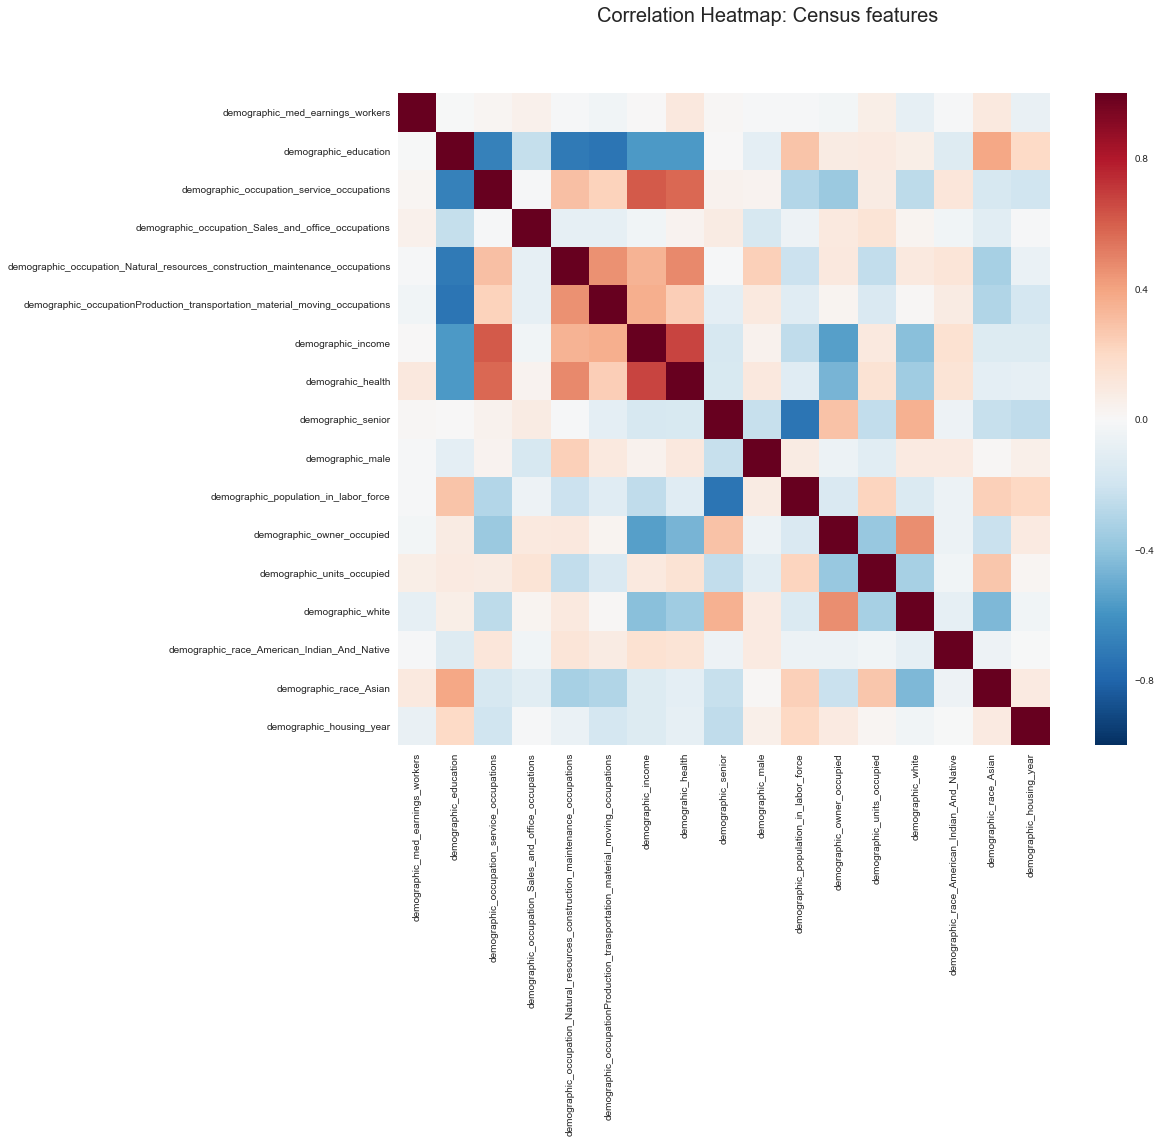

In [48]:
census_feature_names = [
    'demographic_med_earnings_workers', 'demographic_education',
       'demographic_occupation_service_occupations',
       'demographic_occupation_Sales_and_office_occupations',
       'demographic_occupation_Natural_resources_construction_maintenance_occupations',
       'demographic_occupationProduction_transportation_material_moving_occupations',
       'demographic_children', 'demographic_income', 'demograhic_health',
       'demographic_senior', 'demographic_male',
       'demographic_population_in_labor_force',
       'demographic_owner_occupied', 'demographic_units_occupied',
       'demographic_white', 'demographic_race_American_Indian_And_Native',
       'demographic_race_Asian', 'demographic_mortgage',
       'demographic_housing_year', 'demographic_travel_time'
]
census_feature_names = [i for i in census_feature_names if i in data_features]
census_features = data_features[census_feature_names].copy()

#Correlation Heatmap
corrmat = census_features.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot=False, fmt='.1f')

f.suptitle('Correlation Heatmap: Census features', fontsize=20);

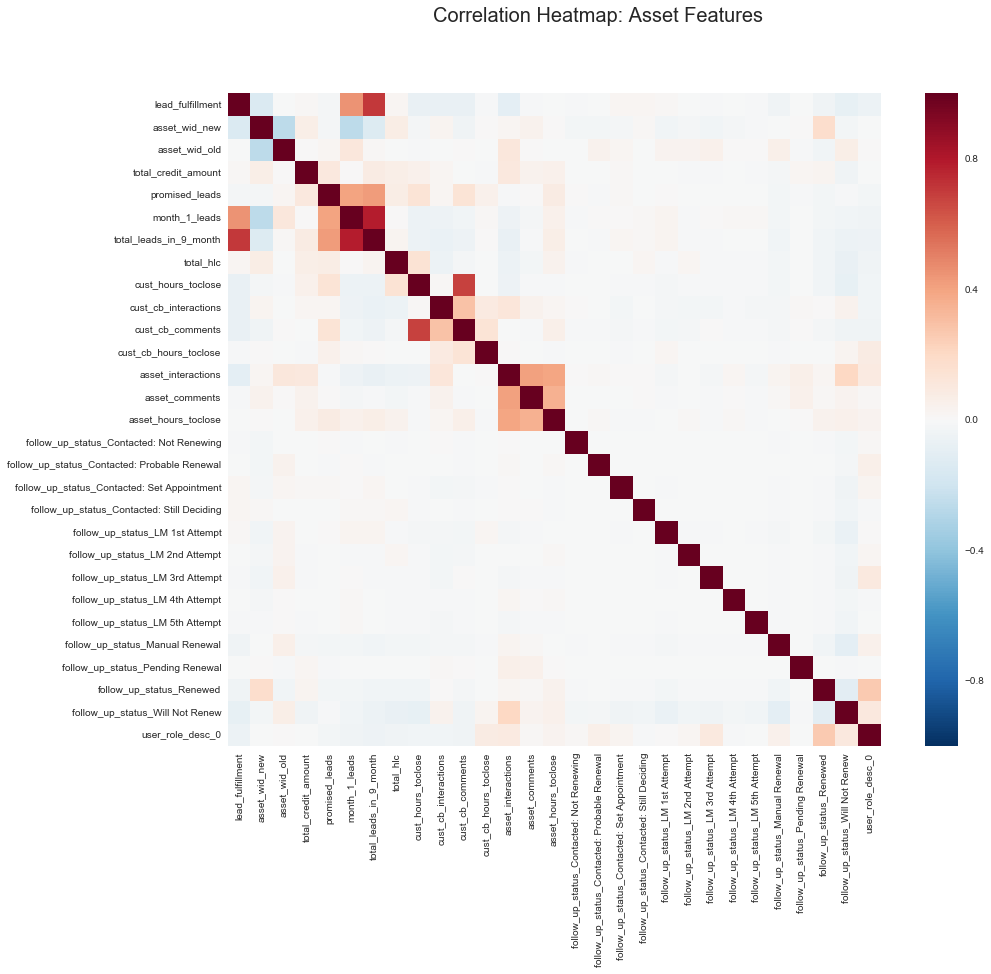

In [53]:
asset_feature_names = ['annual_contract_value', 'original_total_net',
       'account_sub_type', 'id', 'lead_fulfillment', 'old_start_date',
       'old_end_date', 'end_date', 'new_full_half', 'old_status',
       'asset_wid_new', 'asset_wid_old', 'last_activity_date',
       'account_id', 'account_name',   
                       
       'total_credit_amount', 'total_contract_value', 'Renewal_Price',
       'Expiring_Contract_Total_Net', 'promised_leads',
# 'flex_total_slots',
 #      'Flex_total_slot_value', 'Fast_total_slot_value',
 #      'total_slots_owned',  
       'overall_avg_lead_listing_price', 'month_1_leads',
       'fulfillment_perc_in_3_month', 'fulfillment_perc_in_6_month',
       'total_leads_in_9_month', 'fulfillment_perc_in_9_month',
       'lead_fulfillment_12_mon', 'month_1_leads_avg_price',
       'month_2_leads_avg_price', 'month_3_leads_avg_price',
       'month_4_leads_avg_price', 'month_5_leads_avg_price',
       'month_6_leads_avg_price', 'month_7_leads_avg_price',
       'month_8_leads_avg_price', 'month_9_leads_avg_price',
       'month_10_leads_avg_price', 'month_11_leads_avg_price',
       'month_12_leads_avg_price', 'primary_mls_id', 'total_hlc',
       'market_type', 'cust_hours_toclose', 'cust_cb_interactions',
       'cust_cb_comments', 'cust_cb_hours_toclose', 'asset_interactions',
       'asset_comments', 'asset_hours_toclose', 
                       
       'lead_perc_in_last_3_months', 
        'asset_start_date', 'asset_end_date',
       'contract_start_date', 'contract_end_date',
 
           'follow_up_status_Contacted: Not Renewing',
       'follow_up_status_Contacted: Probable Renewal',
       'follow_up_status_Contacted: Set Appointment',
       'follow_up_status_Contacted: Still Deciding',
       'follow_up_status_LM 1st Attempt',
       'follow_up_status_LM 2nd Attempt',
       'follow_up_status_LM 3rd Attempt',
       'follow_up_status_LM 4th Attempt',
       'follow_up_status_LM 5th Attempt',
       'follow_up_status_Manual Renewal',
       'follow_up_status_Pending Renewal', 'follow_up_status_Renewed',
       'follow_up_status_Will Not Renew', 'user_role_desc_0',

]

asset_feature_names = [i for i in asset_feature_names if i in data_features]
asset_features = data_features[asset_feature_names].copy()

#Correlation Heatmap
corrmat = asset_features.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot=False, fmt='.1f')

f.suptitle('Correlation Heatmap: Asset Features', fontsize=20);

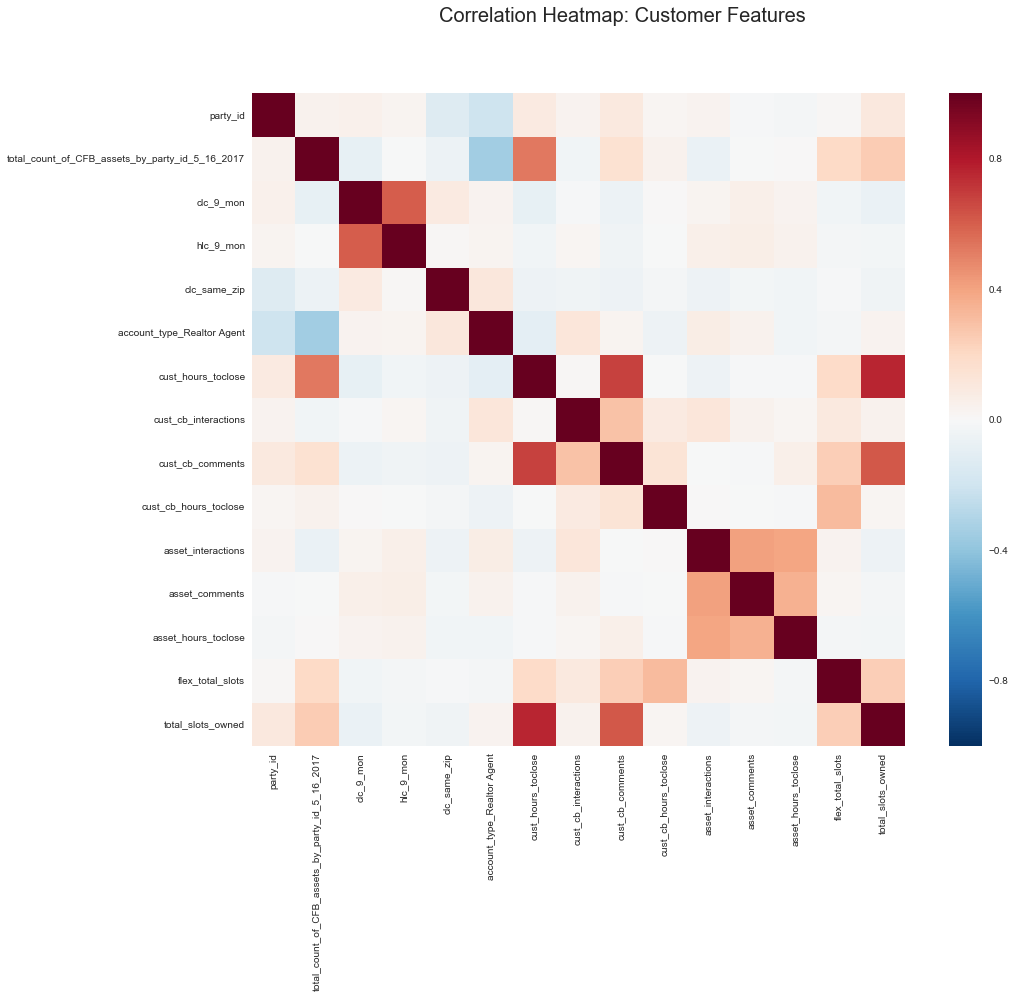

In [51]:
customer_feature_names = ['party_id', 
'total_count_of_CFB_assets_by_party_id_5_16_2017',
'recently_cancelled_contracts',
'clc_9_mon', 'hlc_9_mon',
'clc_same_zip',
'account_id',
'account_sub_type',
'account_name',
'account_type_Realtor Agent',
                         
 'flex_total_slots',
       'Flex_total_slot_value', 'Fast_total_slot_value',
       'total_slots_owned',

                          
]

customer_feature_names = [i for i in customer_feature_names if i in data_features]
customer_features = data_features[customer_feature_names].copy()

#Correlation Heatmap
corrmat = customer_features.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot=False, fmt='.1f')

f.suptitle('Correlation Heatmap: Customer Features', fontsize=20);

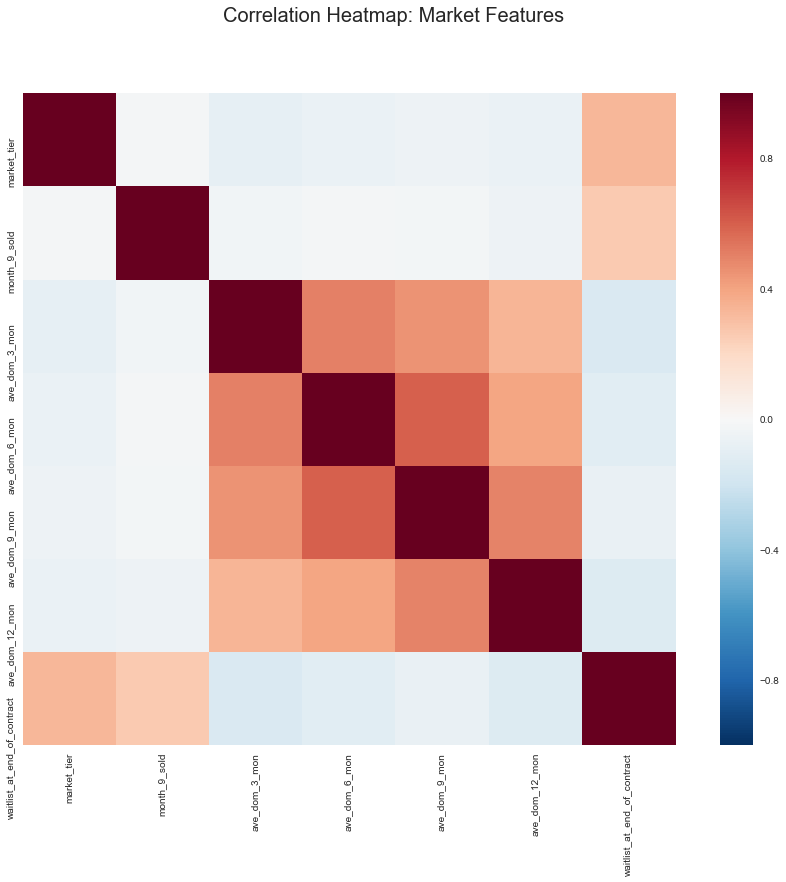

In [56]:
market_feature_names = ['market',
                        'market_tier', 
                         'month_1_sell_thru',
       'month_2_sell_thru', 'month_3_sell_thru', 'month_4_sell_thru',
       'month_5_sell_thru', 'month_6_sell_thru', 'month_7_sell_thru',
       'month_8_sell_thru', 'month_9_sold', 'month_9_sell_thru',
       'month_10_sell_thru', 'month_11_sell_thru', 'month_12_sell_thru',
       'ave_dom_3_mon', 'ave_dom_6_mon', 
       'ave_dom_9_mon', 'ave_dom_12_mon',
                        'median_price_of_leads',
                               'waitlist_at_end_of_contract',

                        
]
market_feature_names = [i for i in market_feature_names if i in data_features]
market_features = data_features[market_feature_names].copy()

#Correlation Heatmap
corrmat = market_features.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot=False, fmt='.1f')

f.suptitle('Correlation Heatmap: Market Features', fontsize=20);

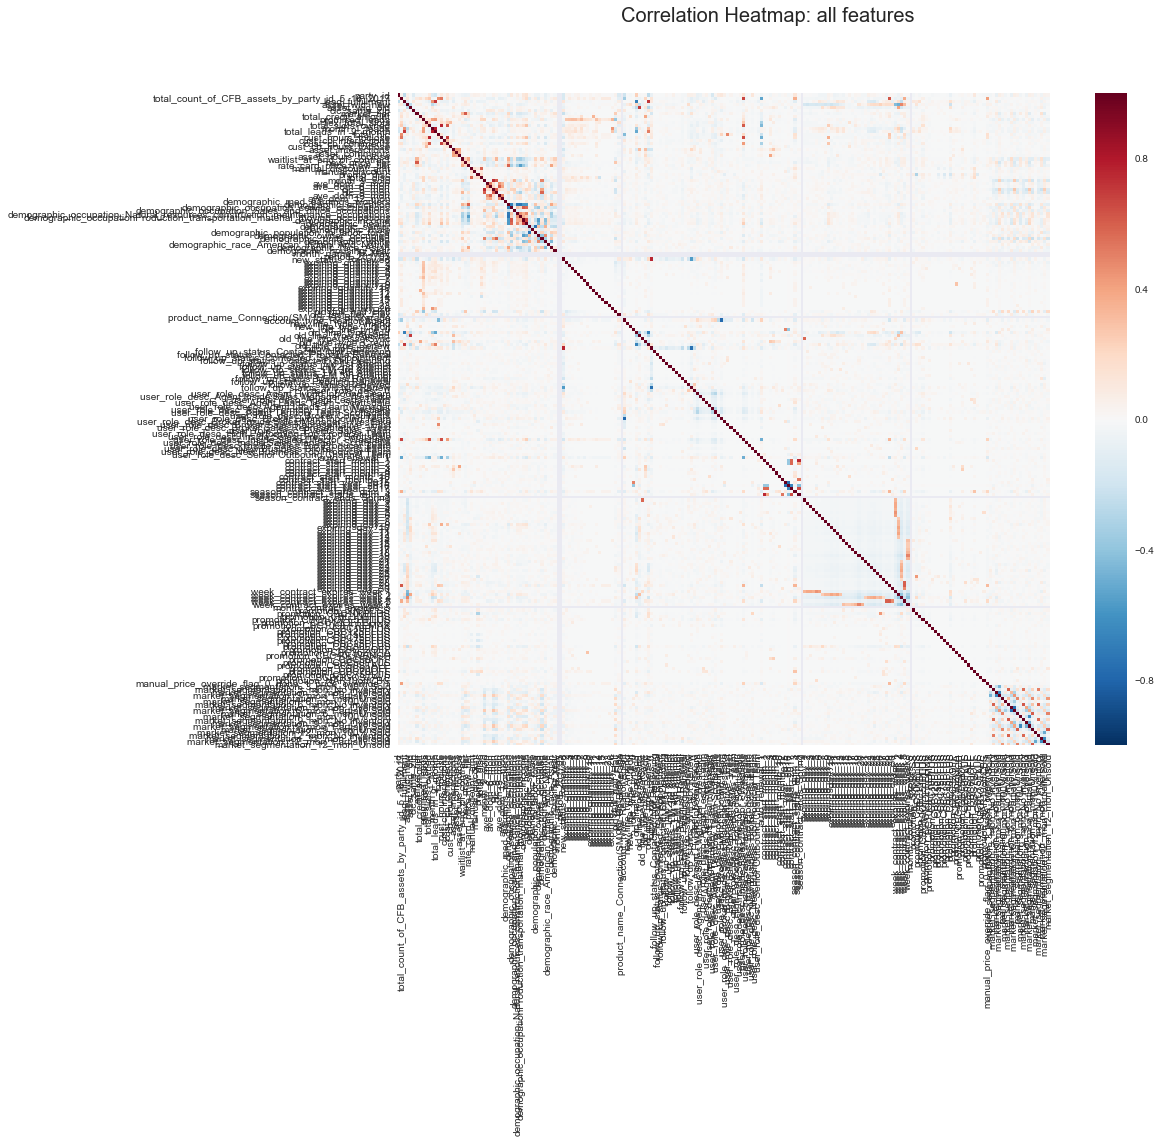

In [54]:
#Correlation Heatmap
corrmat = data_features.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmin = -1, vmax=1, square=True, annot=False, fmt='.1f')

f.suptitle('Correlation Heatmap: all features', fontsize=20);

## Separate feature dataframe into training and testing portions

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data_features, y, test_size = 0.2, random_state = 0)

## Fitting logistic regression to the training set

In [59]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 

In [60]:
# predicting test set result
y_pred = classifier.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet

# Making the confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

## Train logistic regression on just broker contract segment from training set

## Train logistic regression on just flex realtor contract segment from training set